In [33]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
default_dir = "/content/gdrive/My Drive"
app_train = pd.read_csv(os.path.join(default_dir, 'FIFA_train.csv'))
app_test = pd.read_csv(os.path.join(default_dir, 'FIFA_test.csv'))

def get_apps_dataset():
    default_dir = "/content/gdrive/My Drive"
    app_train = pd.read_csv(os.path.join(default_dir, 'FIFA_train.csv'))
    app_test = pd.read_csv(os.path.join(default_dir, 'FIFA_test.csv'))
    apps = pd.concat([app_train, app_test])
    
    return apps


In [5]:
apps = get_apps_dataset()

In [8]:
apps.info()
# continent, position, prefer_foot은 명목변수 / reputation, stat_skill_moves는 순위변수 / - 더미변수화 필요 
# id, name, contract_until과 같은 변수는 필요없어보임
# value 변수를 보면 8932개로 12760 - 8932 = 3828개의 NA값이 있음 - 평균으로 대체 또는 제거 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12760 entries, 0 to 3827
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12760 non-null  int64  
 1   name              12760 non-null  object 
 2   age               12760 non-null  int64  
 3   continent         12760 non-null  object 
 4   contract_until    12760 non-null  object 
 5   position          12760 non-null  object 
 6   prefer_foot       12760 non-null  object 
 7   reputation        12760 non-null  float64
 8   stat_overall      12760 non-null  int64  
 9   stat_potential    12760 non-null  int64  
 10  stat_skill_moves  12760 non-null  float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.3+ MB


In [13]:
# 범주형 변수들에 대해서 각각 가지는 unique 값 확인
name = ['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']
for i in name:
  print('{}:'.format(i), apps[i].unique(), '\n')

continent: ['south america' 'europe' 'africa' 'asia' 'oceania'] 

position: ['ST' 'GK' 'DF' 'MF'] 

prefer_foot: ['left' 'right'] 

reputation: [5. 4. 3. 1. 2.] 

stat_skill_moves: [4. 1. 3. 2. 5.] 



In [16]:
# 범주형 변수들의 unique한 값들이 어떻게 분포되어 있는지 확인
name = ['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']

for i in name:
  print(apps.loc[:, i].value_counts(), '\n')

europe           7591
south america    2765
asia             1137
africa           1015
oceania           252
Name: continent, dtype: int64 

MF    4859
DF    4061
ST    2422
GK    1418
Name: position, dtype: int64 

right    9752
left     3008
Name: prefer_foot, dtype: int64 

1.0    11416
2.0     1029
3.0      260
4.0       49
5.0        6
Name: reputation, dtype: int64 

2.0    5605
3.0    4924
1.0    1418
4.0     769
5.0      44
Name: stat_skill_moves, dtype: int64 



In [80]:
# 위의 범주형 변수들을 제외하고 이산형 변수들에 대해 기초통계량 확인
data[['age','stat_overall','stat_potential','value']].describe()

# value변수의 mean이 제 3사분위수에 해당하는 값으로 median에 비해서 상당히 오른쪽에 위치, 즉 right-skewed한 분포를 보일 것이라고 예상 가능 

,age,stat_overall,stat_potential,value
count,12760.000000,12760.000000,12760.000000,1.276000e+04
mean,25.235737,67.164890,72.030329,2.778673e+06
std,4.633329,6.871778,6.032070,4.886834e+06
min,16.000000,47.000000,48.000000,1.000000e+04
25%,22.000000,63.000000,68.000000,5.500000e+05
50%,25.000000,67.000000,72.000000,2.100000e+06
75%,28.250000,72.000000,76.000000,2.778673e+06
max,42.000000,94.000000,95.000000,1.105000e+08


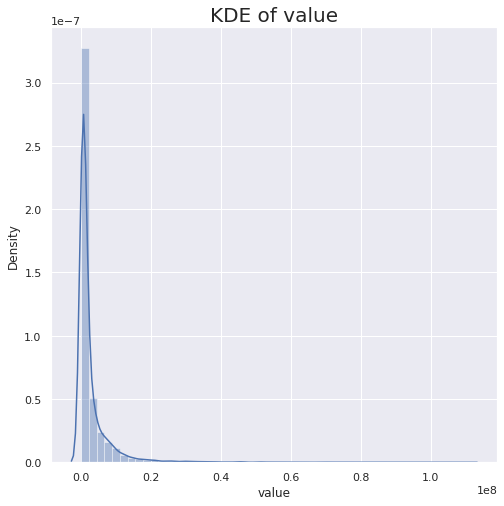

In [40]:
# value변수에 대한 커널밀도추정
a = apps['value']
plt.figure(figsize=(8,8))
ax = sns.distplot(a)
ax.set_title('KDE of value', size=20)
plt.show()

In [6]:
# id, name, contract_until 변수 제거 및 결측치 평균값으로 대체
data = apps.drop(['id', 'name', 'contract_until'], axis=1)
data = data.fillna(data.value.mean())
data.isna().sum()

age                 0
continent           0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

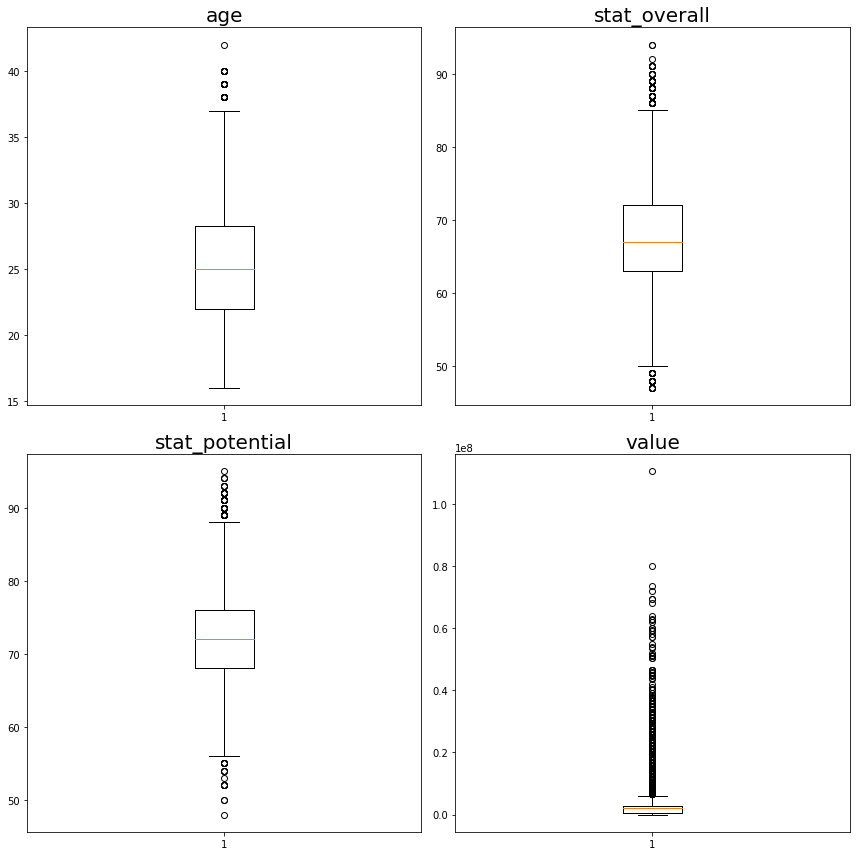

In [38]:
# 연속형변수들에 대해 box-plot으로 outliers로 의심되는 값들 확인
b = ['age','stat_overall','stat_potential','value']
fig, axes = plt.subplots(2,2, figsize=(12,12))
for idx, ax in enumerate(axes.flat):
  ax.boxplot(data[b[idx]])
  ax.set_title(b[idx], size=20)
fig.tight_layout()

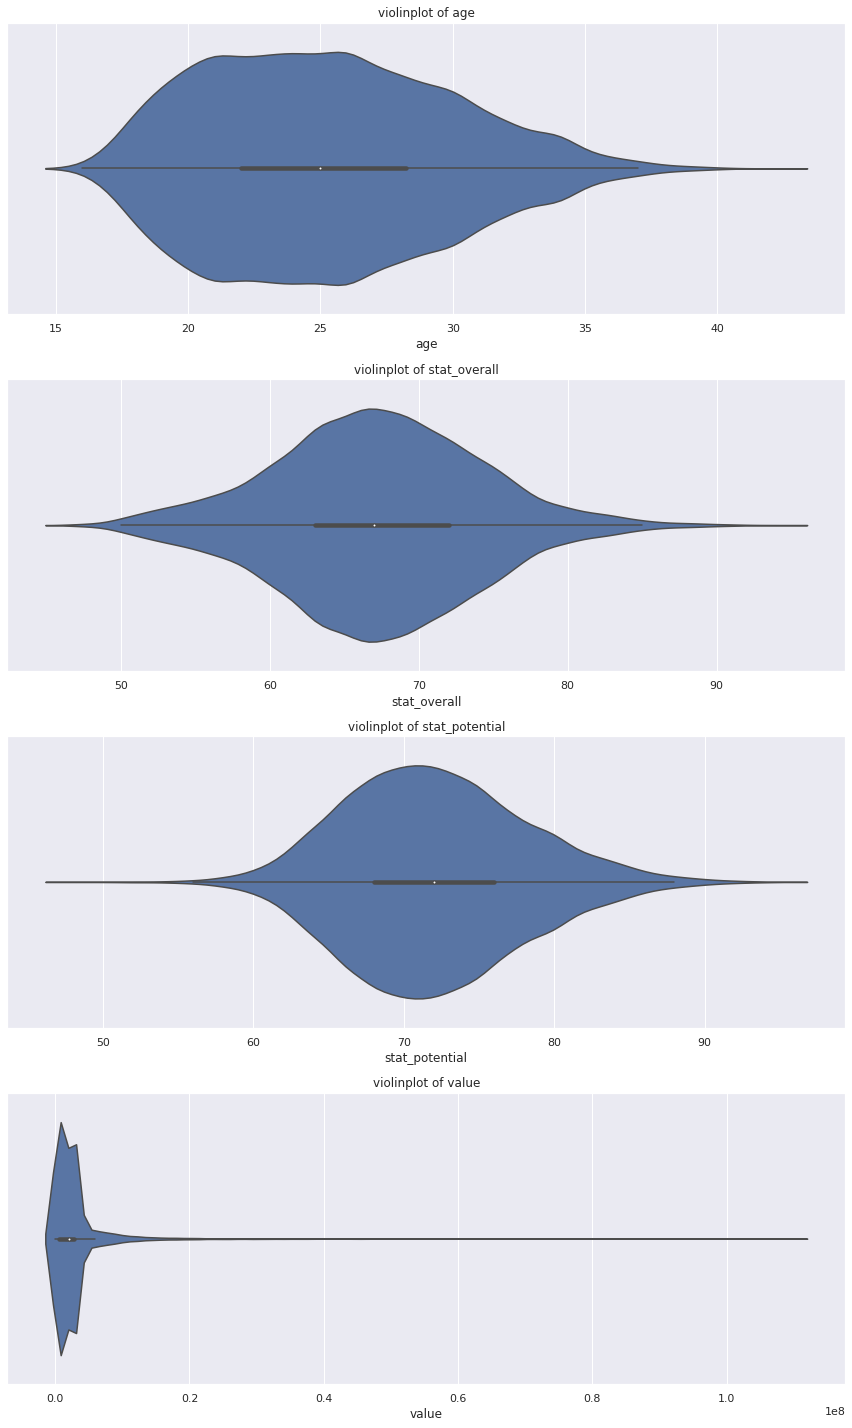

In [58]:
# 위의 boxplot의 단점을 보완한 violinplot
ft_name = ['age', 'stat_overall', 'stat_potential', 'value' ]
sns.set(rc = {'figure.figsize':(12,20)})
fig, axs = plt.subplots(nrows = 4, ncols=1)
axs = axs.flat
for i,name in enumerate(ft_name):
  a = sns.violinplot(x=name, data=data, ax=axs[i])
  a.set_title('violinplot of {}'.format(name))
fig.tight_layout()

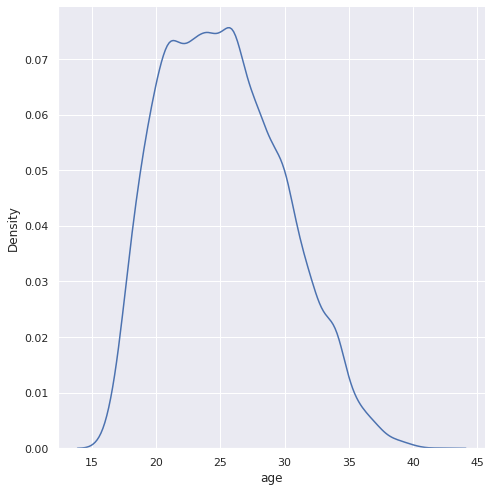

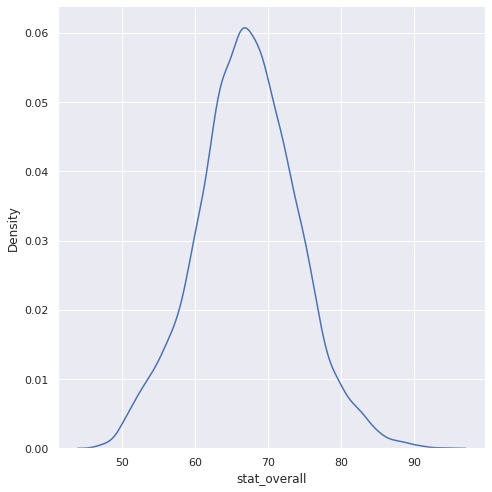

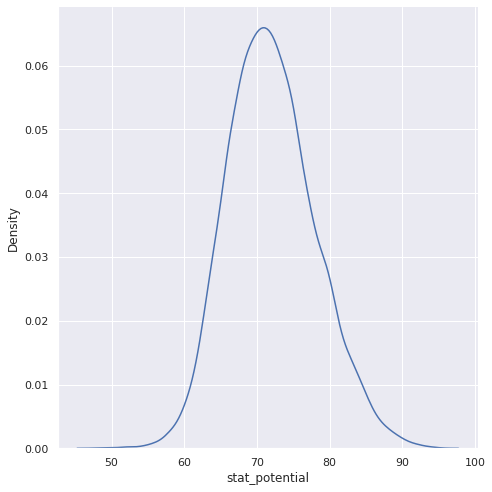

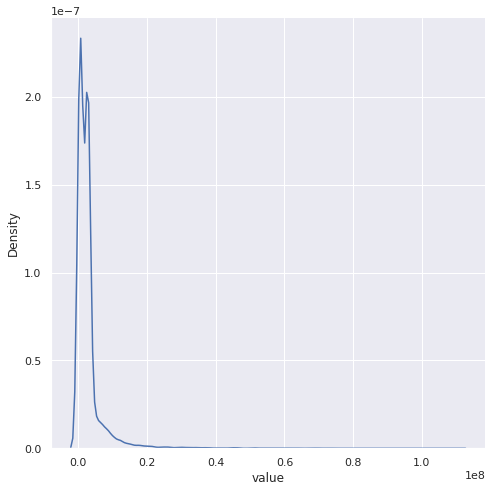

In [67]:
# 위의 violinplot으로 확인한 분포의 모양을 이번에는 커널밀도추정으로 확인
b = ['age','stat_overall','stat_potential','value']


for name in b:
  sns.displot(data[name], kind='kde', height=7)
  plt.show()
  print('\n')
  

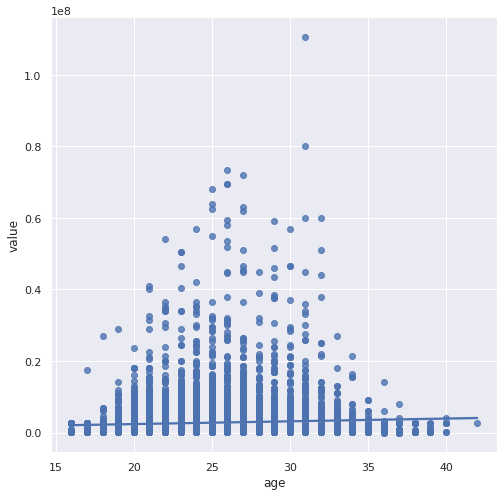

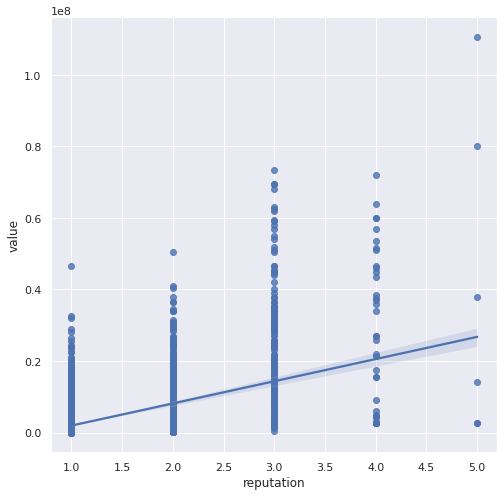

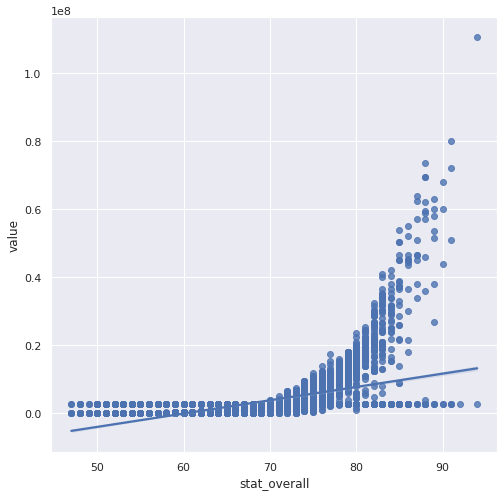

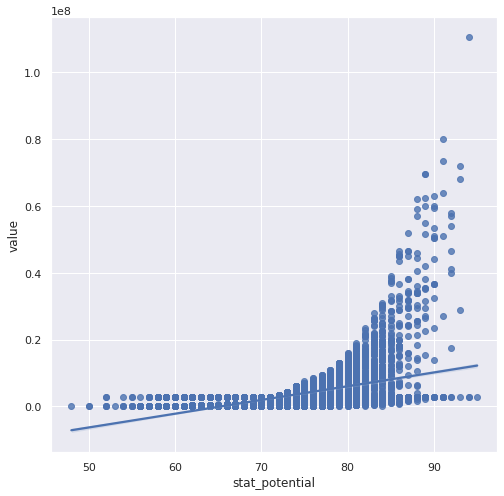

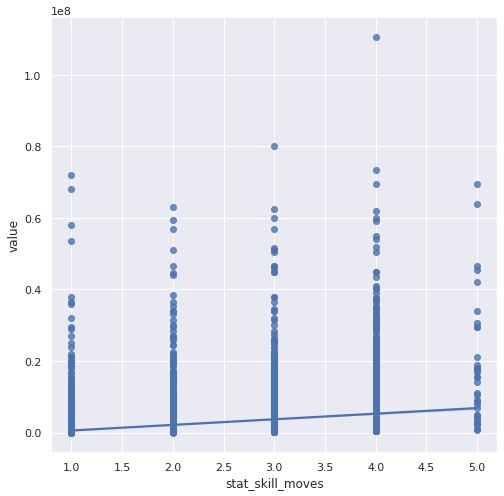

In [65]:
# 종속변수 value와 다음의 변수들이 어떠한 선형관계가 있는지를 시각적으로 확안
ft_name = ['age', 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']
sns.set(rc = {'figure.figsize':(8,8)})

for i, ft in enumerate(ft_name):
  sns.regplot(x=ft, y='value', data=data)
  plt.show()
  print('\n')

In [68]:
# 변수간 상관관계 

corr_df = data[['stat_overall','stat_potential','value', 'stat_skill_moves', 'reputation']].corr()
corr_df

,stat_overall,stat_potential,value,stat_skill_moves,reputation
stat_overall,1.000000,0.672142,0.549532,0.409598,0.529718
stat_potential,0.672142,1.000000,0.508222,0.345779,0.407202
value,0.549532,0.508222,1.000000,0.249248,0.547408
stat_skill_moves,0.409598,0.345779,0.249248,1.000000,0.215976
reputation,0.529718,0.407202,0.547408,0.215976,1.000000


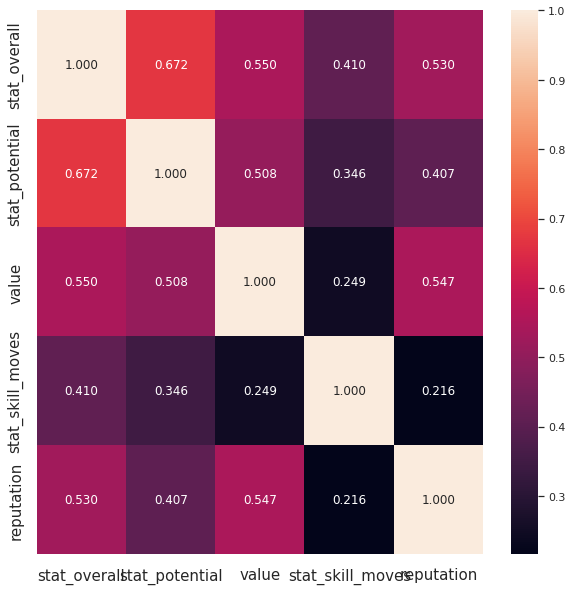

In [70]:
# 변수간 상관관계  시각화

plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_df, annot=True, fmt='.3f')
ax.tick_params(labelsize=15, length=10, width=3)
plt.show()

In [7]:
# 'continent', 'position', 'prefer_foot', 'reputation','stat_skill_moves' 에 대해 더미변수화
name = ['continent', 'position', 'prefer_foot']
dummies = pd.get_dummies(apps[name], drop_first=True)
fifa = pd.concat([data, dummies], axis=1).drop(name, axis=1)
final_df = pd.get_dummies(fifa, columns=['reputation','stat_skill_moves'], drop_first=True)

In [8]:
# 각각의 범주의 수에 맞게 더미변수화 된 것을 확인할 수 있음
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12760 entries, 0 to 3827
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      12760 non-null  int64  
 1   stat_overall             12760 non-null  int64  
 2   stat_potential           12760 non-null  int64  
 3   value                    12760 non-null  float64
 4   continent_asia           12760 non-null  uint8  
 5   continent_europe         12760 non-null  uint8  
 6   continent_oceania        12760 non-null  uint8  
 7   continent_south america  12760 non-null  uint8  
 8   position_GK              12760 non-null  uint8  
 9   position_MF              12760 non-null  uint8  
 10  position_ST              12760 non-null  uint8  
 11  prefer_foot_right        12760 non-null  uint8  
 12  reputation_2.0           12760 non-null  uint8  
 13  reputation_3.0           12760 non-null  uint8  
 14  reputation_4.0         